In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

from q4_f import f, gradient
from conjugate_gradient import ncg
from convergence_plots import error_convergence, gradient_norm_convergence, trajectories_convergence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Nonlinear conjugate gradient algorithm with Fletcher-Reeves updates for the descent direction
After 36 iterations, x_min = [0.367479, 3e-05], f(x_min) = -0.3677854089975569


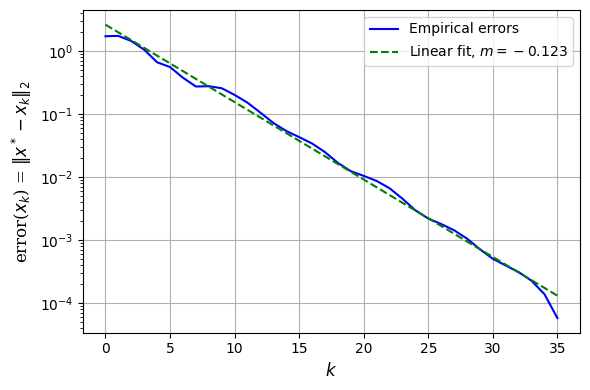

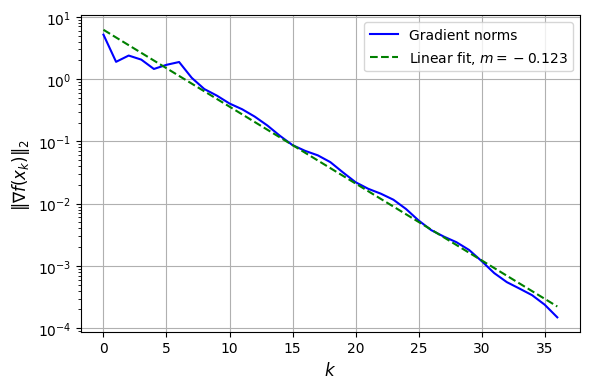

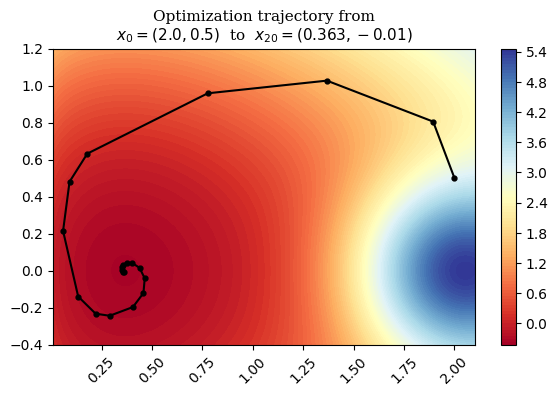

In [2]:
xs, errors = ncg(
    x_0=np.array([[2.],[0.5]]),
    method='fr',
    max_iter=50
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=True)
gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=20, end_idx=None,
    xlims=((0.01, 2.1),None), 
    ylims=((-0.4, 1.2),None),
    arrows=False
)

Nonlinear conjugate gradient algorithm with Fletcher-Reeves updates for the descent direction
After 200 iterations, x_min = [0.000484, 0.130434], f(x_min) = 0.01332143243450659


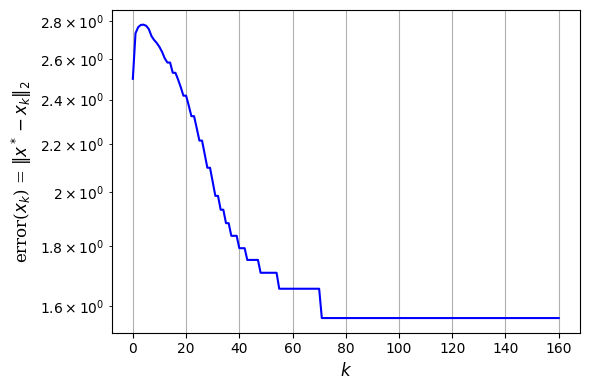

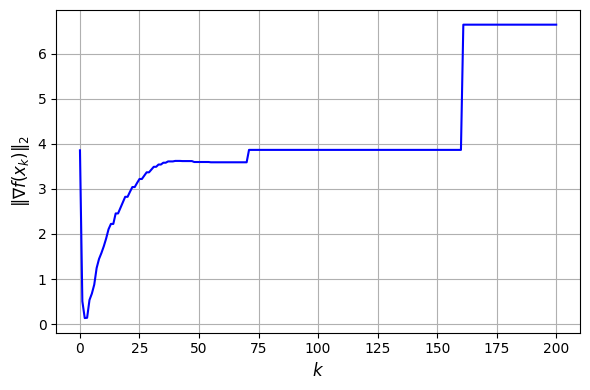

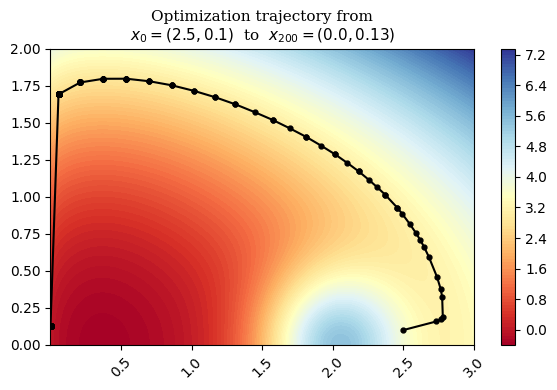

In [57]:
xs, errors, dirs, steps = ncg(
    x_0=np.array([[2.5],[0.1]]),
    method='fr',
    max_iter=200
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=False)
gradient_norm_convergence(xs, gradient, ylog=False)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=200, end_idx=None,
    xlims=((0.0001, 3.),(0.055, 0.059)),
    ylims=((0.,2.),(1.67,1.71)),
    arrows=False
)

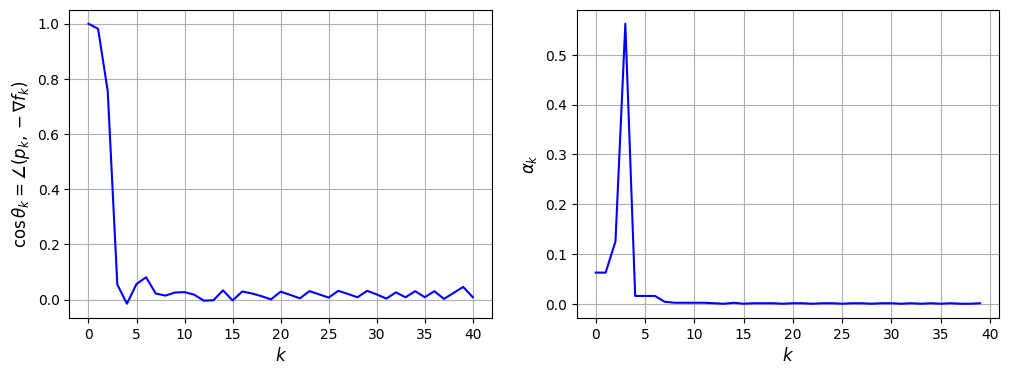

In [37]:
import matplotlib.pyplot as plt
from convergence_plots import fontdict

grads = [gradient(x) for x in xs]
angles = [-(grad.T@dir).item()/(np.linalg.norm(grad)*np.linalg.norm(dir)) for grad, dir in zip(grads, dirs)]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(angles, color='blue')
plt.xlabel(r'$k$', fontdict=fontdict)
plt.ylabel(r'$\cos\theta_k = \angle(p_k,-\nabla f_k)$', fontdict=fontdict)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(steps, color='blue')
plt.xlabel(r'$k$', fontdict=fontdict)
plt.ylabel(r'$\alpha_k$', fontdict=fontdict)
plt.grid()

plt.show()

Nonlinear conjugate gradient algorithm with Polyak-Ribiere updates for the descent direction
After 12 iterations, x_min = [0.367412, -1e-05], f(x_min) = -0.367785412843306


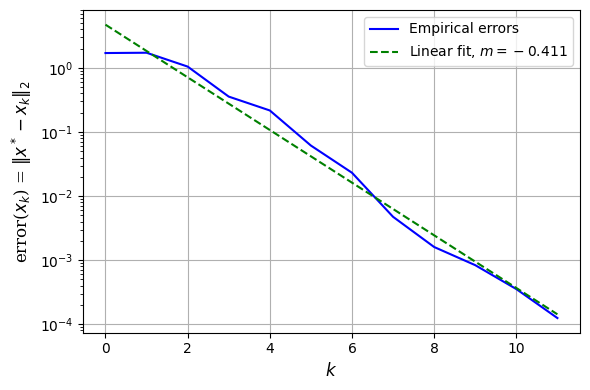

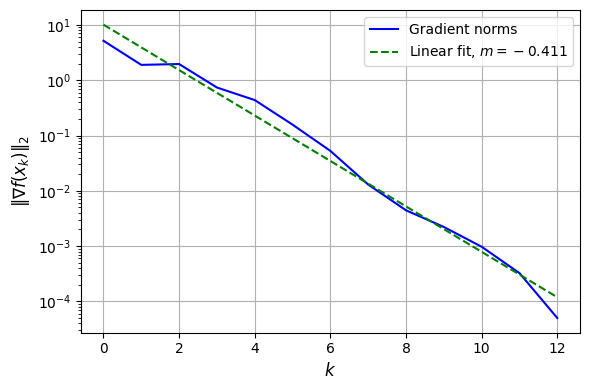

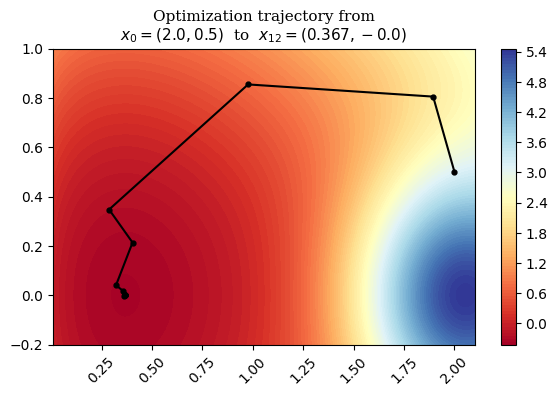

In [4]:
xs, errors = ncg(
    x_0=np.array([[2.],[0.5]]),
    method='pr',
    max_iter=50
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=True)
gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=12, end_idx=None,
    xlims=((0.01, 2.1),None), 
    ylims=((-0.2, 1),None),
    arrows=False
)

Nonlinear conjugate gradient algorithm with Polyak-Ribiere updates for the descent direction
After 18 iterations, x_min = [0.36741, -1.4e-05], f(x_min) = -0.367785412611656


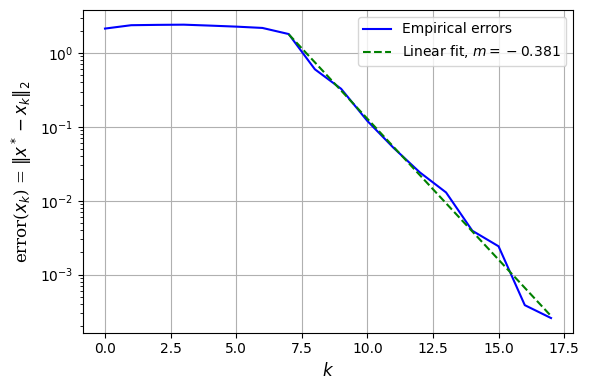

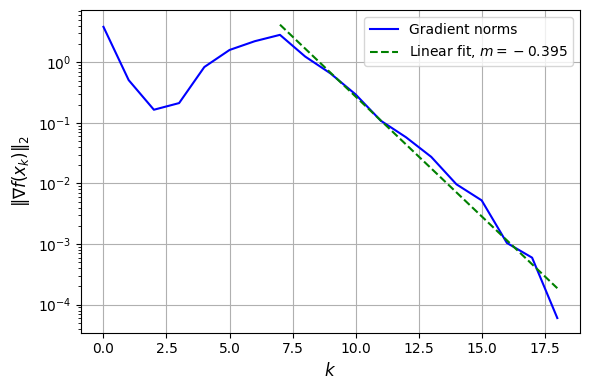

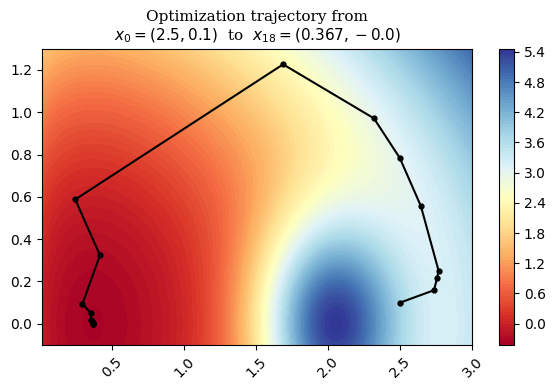

In [5]:
xs, errors = ncg(
    x_0=np.array([[2.5],[0.1]]),
    method='pr',
    max_iter=80
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=True, ignore=7)
gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True, ignore=7)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=18, end_idx=None,
    xlims=((0.01, 3.),None), 
    ylims=((-0.1, 1.3),None),
    arrows=False
)

Nonlinear conjugate gradient algorithm with Fletcher-Reeves updates for the descent direction
After 20 iterations, x_min = [0.36744, -1.9e-05], f(x_min) = -0.3677854128084743


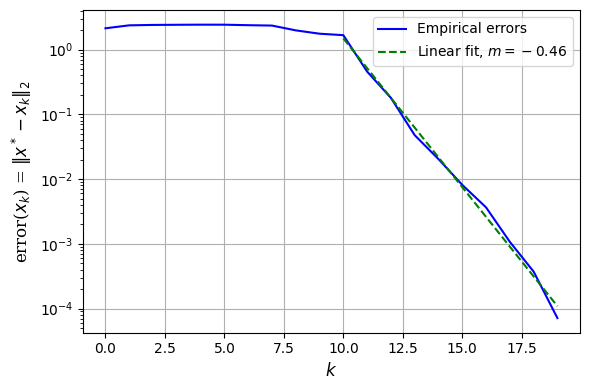

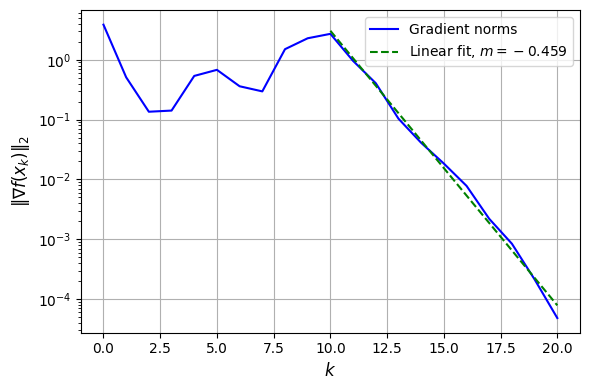

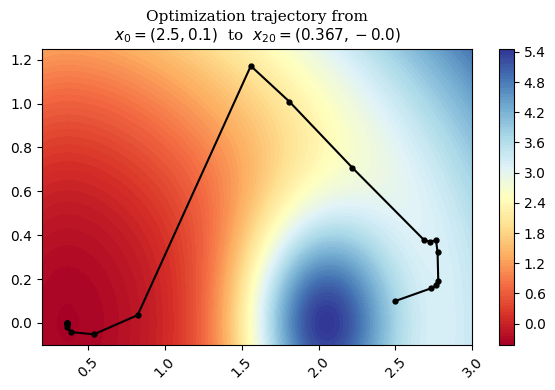

In [81]:
xs, errors, dirs, steps = ncg(
    x_0=np.array([[2.5],[0.1]]),
    method='fr',
    max_iter=200,
    restart=5
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=True, ignore=10)
gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True, ignore=10)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=20, end_idx=None,
    xlims=((0.2, 3.),None),
    ylims=((-0.1,1.25),None),
    arrows=False
)

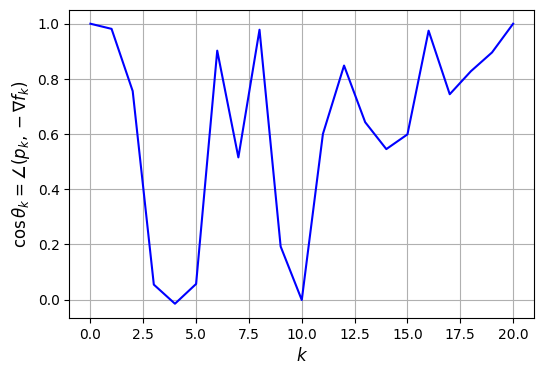

In [84]:
grads = [gradient(x) for x in xs]
angles = [-(grad.T@dir).item()/(np.linalg.norm(grad)*np.linalg.norm(dir)) for grad, dir in zip(grads, dirs)]

plt.figure(figsize=(6, 4))

plt.subplot(1, 1, 1)
plt.plot(angles, color='blue')
plt.xlabel(r'$k$', fontdict=fontdict)
plt.ylabel(r'$\cos\theta_k = \angle(p_k,-\nabla f_k)$', fontdict=fontdict)
plt.grid()

plt.show()